### **Loading the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns

pd.set_option('display.max_columns',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

iris_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml_connect/Iris_dataset_0.csv")
iris_df.rename(columns={'target':'Species'},inplace=True)
iris_df['Species']=iris_df['Species'].map({'0':'Iris-setosa','1':'Iris-versicolor','2':'Iris-virginica'})
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,NaN,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **Data visualization**

[]

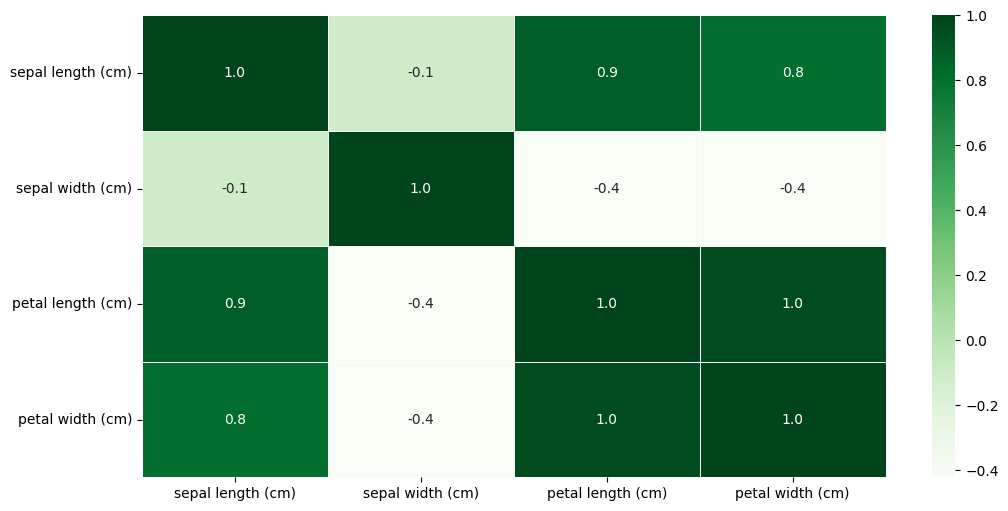

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(iris_df.corr(), annot=True, cmap="Greens", fmt=".1f", linewidths=0.5)
plt.plot()

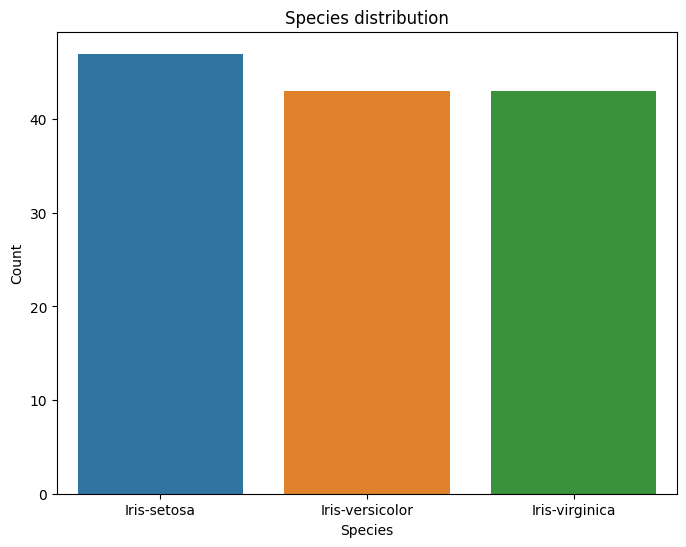

In [ ]:
# Create a count plot for income distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=iris_df,x='Species')
plt.title("Species distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


### **Exploratory data analysis**

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  137 non-null    float64
 1   sepal width (cm)   134 non-null    float64
 2   petal length (cm)  139 non-null    float64
 3   petal width (cm)   137 non-null    float64
 4   Species            133 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,NaN
146,6.3,2.5,5.0,NaN,Iris-virginica
147,6.5,3.0,5.2,2.0,NaN
148,6.2,NaN,5.4,NaN,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
48,5.3,3.7,1.5,0.2,Iris-setosa
110,NaN,3.2,5.1,2.0,Iris-virginica
69,5.6,2.5,3.9,NaN,Iris-versicolor
14,5.8,4.0,1.2,0.2,Iris-setosa
39,5.1,3.4,1.5,0.2,Iris-setosa
102,7.1,3.0,5.9,2.1,Iris-virginica
76,6.8,2.8,4.8,1.4,Iris-versicolor
86,6.7,3.1,NaN,NaN,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
19,5.1,3.8,1.5,0.3,Iris-setosa


In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,137.000000,134.000000,139.00000,137.000000
mean,5.867153,3.059701,3.73741,1.180292
std,0.840440,0.412059,1.77316,0.756136
min,4.300000,2.200000,1.00000,0.100000
25%,5.100000,2.800000,1.60000,0.300000
50%,5.800000,3.000000,4.20000,1.300000
75%,6.400000,3.300000,5.10000,1.800000
max,7.900000,4.200000,6.90000,2.500000


In [ ]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species               object
dtype: object

In [ ]:
iris_df['Species'].unique()

array(['Iris-setosa', nan, 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

### **Data preprocessing**

In [ ]:
iris_df.isnull().sum()

sepal length (cm)    13
sepal width (cm)     16
petal length (cm)    11
petal width (cm)     13
Species              17
dtype: int64

In [ ]:
iris_mean=iris_df.fillna(iris_df.mean(),inplace=False)
print(iris_mean.head(3))
iris_mean.isnull().sum()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1          3.059701                1.4               0.2   
1                4.9          3.000000                1.4               0.2   
2                4.7          3.200000                1.3               0.2   

       Species  
0  Iris-setosa  
1  Iris-setosa  
2          NaN  


sepal length (cm)     0
sepal width (cm)      0
petal length (cm)     0
petal width (cm)      0
Species              17
dtype: int64

In [ ]:
iris_mode=iris_df.fillna(iris_df.mode().iloc[0],inplace=False)
print(iris_mode.tail(3))
iris_mode.isnull().sum()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
147                6.5               3.0                5.2               2.0   
148                6.2               3.0                5.4               0.2   
149                5.9               3.0                5.1               1.8   

            Species  
147     Iris-setosa  
148  Iris-virginica  
149  Iris-virginica  


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [ ]:
iris_ffill=iris_df.fillna(method='ffill')
iris_bfill=iris_df.fillna(method='bfill')
print(iris_ffill.head(5))
print(iris_bfill.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               NaN                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

       Species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.0                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0        

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


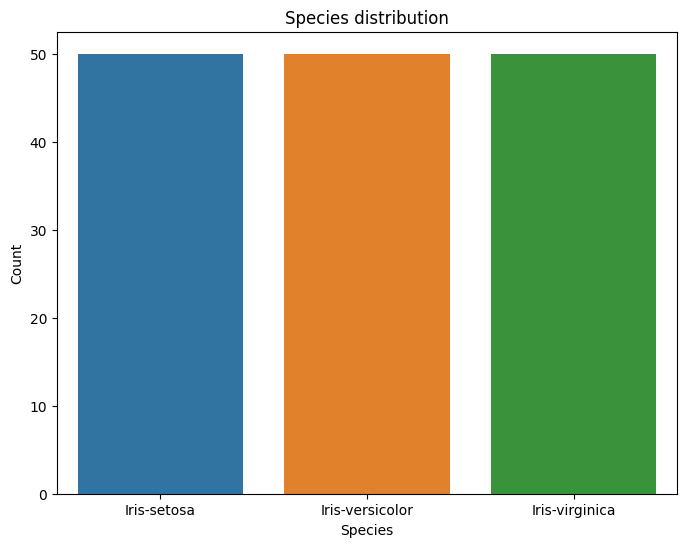

In [ ]:
iris_df=iris_bfill.copy()
print(iris_df.isnull().sum())
# Create a count plot for income distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=iris_df,x='Species')
plt.title("Species distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


In [ ]:
features_list=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
target_list=['Species']

#X=iris.iloc[:,:-1]
#y=iris.iloc[:,-1]
X=iris_df[features_list]
y=iris_df[target_list]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y_encoded,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mms=MinMaxScaler(feature_range=(0,1))
#ss=StandardScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy of the model: ",accuracy_score(y_test,y_pred))

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30

Accuracy of the model:  0.9


In [ ]:
new_obs=[[5.2,3.4,1.0,0.3]]
print("predicted output: ",label_encoder.inverse_transform(classifier.predict(new_obs)))

predicted output:  ['Iris-virginica']
